<a href="https://colab.research.google.com/github/daliarod96/LEAL-Carbon-case-study-exercise/blob/main/case_study_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import numpy as np

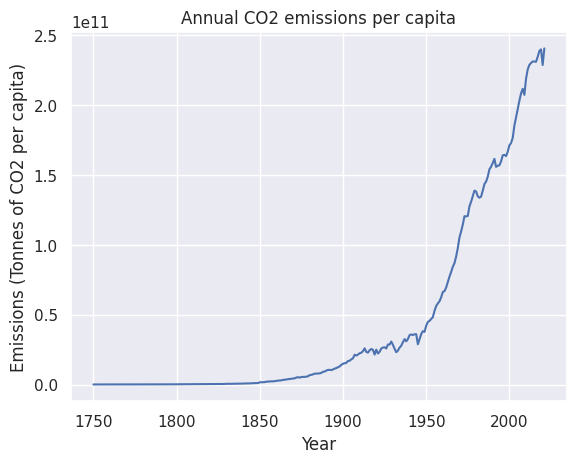

In [2]:
# annual CO2 emissions data from Our World In Data
# source: https://ourworldindata.org/co2-and-greenhouse-gas-emissions

c02_percountry = pd.read_csv("/content/drive/MyDrive/LEAL CarbonTracker/annual-co2-emissions-per-country.csv")
c02_percountry.head()

c02_worldwide = {}
min = c02_percountry['Year'].min()
max = c02_percountry['Year'].max()

for year in range(min, max+1):
  c02_worldwide[year] = c02_percountry[c02_percountry['Year'] == year]['Annual CO₂ emissions'].sum()
c02_worldwide = pd.DataFrame({'Year': c02_worldwide.keys(), 'Emissions (Tonnes of CO2 per capita)': c02_worldwide.values()})

fig,ax = plt.subplots()
sns.lineplot(data = c02_worldwide, x = 'Year', y='Emissions (Tonnes of CO2 per capita)', ax= ax)
ax.set_title('Annual CO2 emissions per capita')
plt.show()

Gases in the atmosphere trap heat from the Sun to keep our planet warm enough to support life, a process known as the greenhouse effect[[1]](https://www.epa.gov/ghgemissions/global-greenhouse-gas-emissions-data).

In the last 150 years, human activity has corrupted this naturally-occurring phenomenon.  



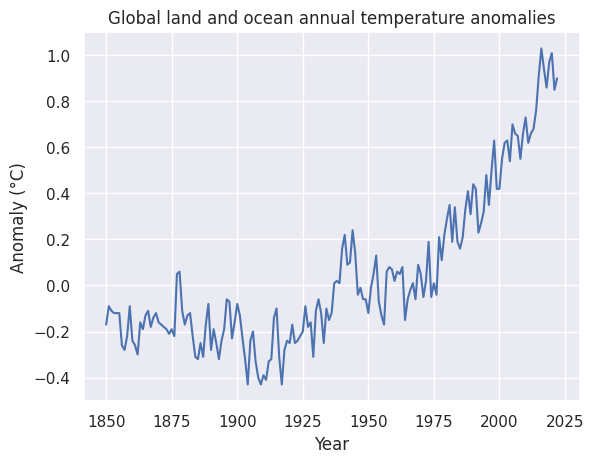

In [3]:
# annual temperature anomalies data from the National Centers for Environmental Information
# source: https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/ytd/12/1850-2022
temperature = pd.read_csv("/content/drive/MyDrive/LEAL CarbonTracker/data.csv", sep=',', skiprows=4)
temperature

fig, ax = plt.subplots()
fig = sns.lineplot(data = temperature, x = 'Year', y = 'Anomaly', ax=ax)
ax.set_title('Global land and ocean annual temperature anomalies')
ax.set_ylabel('Anomaly (°C)')
plt.show()

Abnormally large concentrations of Carbon dioxide (CO2) from fossil fuel burning for transportation and electricity; methane (CH4) and nitrous oxide (N2O) from agricultural activities and waste management; and fluorinaged gases (F-gases) from industrial processes and refrigeration are being trapped in the atmosphere, warming up the Earth to unsustainable temperatures [[1]](https://www.epa.gov/ghgemissions/global-greenhouse-gas-emissions-data).

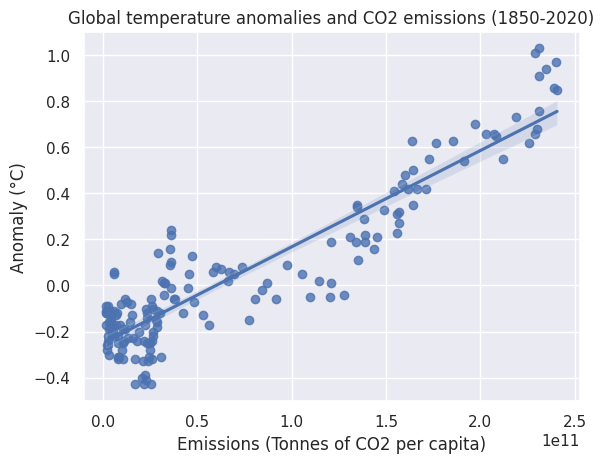

In [4]:
# global temperature anomalies vs co2 emissions
anomaly = np.array(temperature.iloc[0:172,:]['Anomaly'])
emissions = np.array(c02_worldwide.iloc[100:, :]['Emissions (Tonnes of CO2 per capita)'])
combined = pd.DataFrame({'Anomaly': anomaly, 'Emissions (Tonnes of CO2 per capita)': emissions})

fig, ax = plt.subplots()
fix = sns.regplot(data=combined, x='Emissions (Tonnes of CO2 per capita)', y = 'Anomaly', ax=ax)
ax.set_title('Global temperature anomalies and CO2 emissions (1850-2020)')
ax.set_ylabel('Anomaly (°C)')
plt.show()

Since 1850, global temperatures have increased by 1.1 °C [[2]](https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/ytd/12/1850-2022).

Climate change has led to more extreme weather events: flooding, droughts, melting ice caps, a rise in sea levels, and changes in habitat ranges for plants and animals[[3]](https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature).

July 2023 was the hottest month ever recorded[[4]](https://public.wmo.int/en/media/news/copernicus-confirms-july-2023-was-hottest-month-ever-recorded/).

Despite efforts to stabilize temperatures, such as the Paris Agreement signed by 175 countries seeking to limit global warming to 1.5 °C [[5]](https://unfccc.int/process-and-meetings/the-paris-agreement), temperatures keep climbing.

It is estimated that temperatures will rise beyond 1.5 °C in the next one to five years [[6]](https://unfccc.int/process-and-meetings/the-paris-agreement).

Higher temperatures mean we will see harsher and more frequent severe extreme weather events.

# **Sources of greenhouse gas emissions**



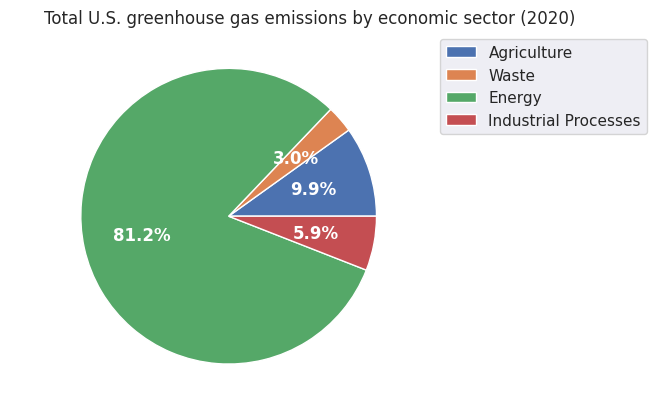

In [5]:
# U.S. greenhouse gas emissions by economic sector (2020)
# source: https://www.epa.gov/ghgemissions/state-ghg-emissions-and-removals
c02_bysector = pd.read_excel("/content/drive/MyDrive/LEAL CarbonTracker/AllStateGHGData_042623.xlsx", sheet_name ='Data by Econ Sect')

values = [None]*5
sector = [None]*5

for i,sec in zip(range(5), c02_bysector.SECTOR.unique()):
    values[i] = c02_bysector[(c02_bysector['SECTOR']==sec)].loc[:, 'Y2020'].sum()
    sector[i] = sec
values = np.round(values/np.sum(values)*100, 0)
values[4] = np.round(values[4] / np.sum(values)*100,0)
values[0:4] = np.round(values[0:4] / np.sum(values[0:4])*100,0)

fig, ax = plt.subplots()
ax.pie(values[0:4], labels = sector[0:4], autopct='%1.1f%%',
                                  textprops=dict(color="white", weight='heavy'))
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
ax.set_title('Total U.S. greenhouse gas emissions by economic sector (2020)', loc='left')
plt.show()

In the U.S., the highest generator of CO2 emissions in the world[[7]](https://ourworldindata.org/contributed-most-global-co2), 81.2% of U.S. greenhouse gas emissions in 2020 were from energy.



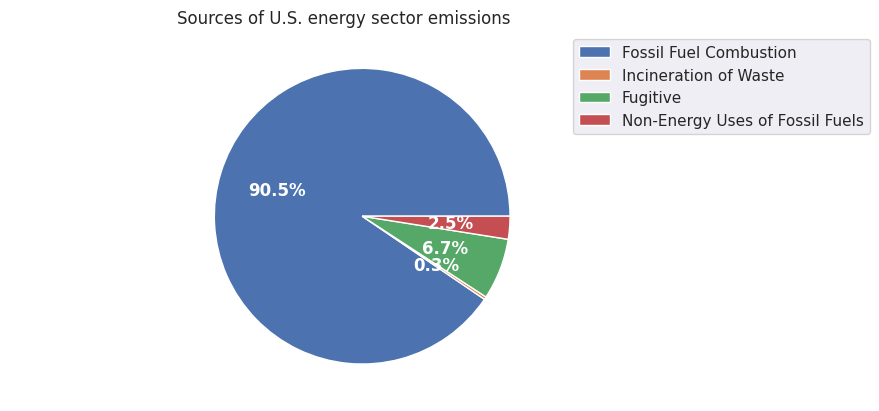

In [6]:
# Sources of U.S energy sector emissions (2020)
values = [None]*4
subsector = [None]*4

for i,sub in zip(range(4), c02_bysector[c02_bysector['SECTOR'] == 'Energy'].SUBSECTOR.unique()):
  values[i] = c02_bysector[(c02_bysector['SECTOR'] == 'Energy')&(c02_bysector['SUBSECTOR']==sub)].loc[:, 'Y2020'].sum()
  subsector[i] = sub
values = np.round(values/np.sum(values)*100, 1)

fig, ax = plt.subplots()
ax.pie(values, labels = subsector, autopct='%1.1f%%',
                                  textprops=dict(color="white", weight='heavy'))
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
ax.set_title('Sources of U.S. energy sector emissions', loc='left')
plt.show()

Most energy-based emissions in the U.S. are from the burning of fossil fuels like gasoline.



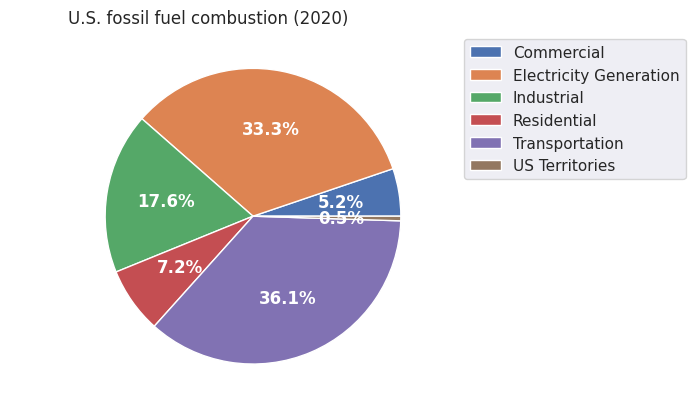

In [7]:
#  fossil fuel combustion (2020)
values = [None]*6
category = [None]*6

query = (c02_bysector['SECTOR'] == 'Energy')&(c02_bysector['SUBSECTOR']=='Fossil Fuel Combustion')
for i,cat in zip(range(6), c02_bysector[query].CATEGORY.unique()):
  values[i] = c02_bysector[query &(c02_bysector['CATEGORY']==cat)].loc[:, 'Y2020'].sum()
  category[i] = cat
values = np.round(values/np.sum(values)*100, 1)

fig, ax = plt.subplots()
ax.pie(values, labels = category, autopct='%1.1f%%',
                                  textprops=dict(color="white", weight='heavy'))
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
ax.set_title('U.S. fossil fuel combustion (2020)', loc='left')
plt.show()

The majority of fossil fuel burning in the U.S. happens for electricity generation and transportation.


In [8]:
co2variables = pd.read_csv('/content/drive/MyDrive/LEAL CarbonTracker/co2variables.csv')
co2variables.drop('Unnamed: 0', axis=1, inplace=True)

The Kaya Identity [[9]](https://www.sciencedirect.com/science/article/abs/pii/0196890495000259) [[10]](https://ourworldindata.org/emissions-drivers) is a framework that decomposes greenhouse gas emissions for a given population into the product of its size, GDP, energy intensity, and carbon intensity.

$\text{total }\text{CO}_{2} \text{emissions} = \text{population}*\text{GDP}*\text{energy intensity}*\text{carbon intensity}$

*   **Energy intensity**: energy consumption per unit of GDP.
*   **Carbon intensity**: CO2 emissions from each unit of energy.

$\text{total }\text{CO}_{2} \text{emissions} = \text{population}*\frac{\text{GDP}}{\text{population}}*\frac{\text{energy}}{\text{GDP}}*\frac{\text{CO}_{2}}{\text{energy}}$

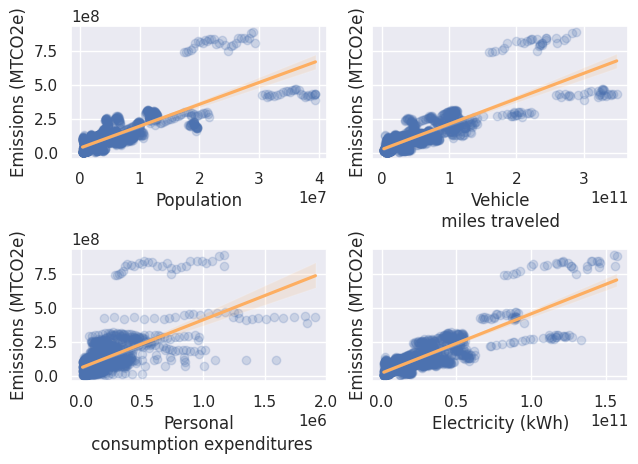

In [9]:
# Kaya identity indicators
# source: https://www.epa.gov/ghgemissions/global-greenhouse-gas-emissions-data
fig, ax = plt.subplots(2,2, sharey=True)
sns.regplot(data=co2variables, x = 'Population', y='Emissions',  ax=ax[0,0],
           scatter_kws={'alpha':0.2}, line_kws={"color": "#fdae61"})
ax[0,0].set_ylabel('Emissions (MTCO2e)')
sns.regplot(data=co2variables, x = 'Vehicle miles traveled', y='Emissions',  ax=ax[0,1],
            scatter_kws={'alpha':0.2}, line_kws={"color": "#fdae61"})
ax[0,1].set_xlabel('Vehicle\n miles traveled ')
ax[0,1].set_ylabel('Emissions (MTCO2e)')
sns.regplot(data=co2variables, x = 'Personal consumption expenditures ', y='Emissions', ax=ax[1,0],
            scatter_kws={'alpha':0.2}, line_kws={"color": "#fdae61"})
ax[1,0].set_ylabel('Emissions (MTCO2e)')
ax[1,0].set_xlabel('Personal\n consumption expenditures')
sns.regplot(data=co2variables, x='Electricity (kWh)', y='Emissions', ax=ax[1,1],
            scatter_kws={'alpha':0.2}, line_kws={"color": "#fdae61"})
ax[1,1].set_ylabel('Emissions (MTCO2e)')

fig.tight_layout()
plt.show()

The more money a population (or invididual) has, the more goods and services they have access to. Consumption requires energy for manufacture and transport of goods and services. Energy and transportation are powered by fossil fuels, the largest emittors of greenhouse gases.


Our dietary patterns also generate carbon emissions.

A kilogram of beef releases 60 kilograms of CO2 equivalents (kg CO2e) into the atmosphere per kilogram of meat[[11]](https://ourworldindata.org/food-choice-vs-eating-local).

A kilogram of poultry releases 6 kg CO2e into the atmosphere per kilogram of meat.

Wheat, corn, tomatoes, soy milk, and other vegetable products have less emit 2 kg CO2e or less into the atmosphere per kg of food.

# **Mitigating Climate Change**

We may be able to prevent the most catastrophic effects of global warming if we take measures to reduce our carbon footprint[[12]](https://climate.nasa.gov/faq/16/is-it-too-late-to-prevent-climate-change/
).
Consumption and lifestyle habits influence individual carbon footprints.
Driving less, recycling, eating less meat, are all ways to offset our carbon footprint.

An AI-powered carbon footprint calculator may
facilitate reduction of personal greenhouse gas
emissions by providing us with data-driven insight
about the sources of our emissions[[13]](https://coolclimate.berkeley.edu/calculator)[[14]](https://www.sciencedirect.com/science/article/pii/S0959652620304431)

.

# **Dataset**

The Kaya identity lets us know that three key factors driving greenhouse gas emissions are **population size**, **income**, and **energy consumption**.


A systematic review of carbon footprint calculators [[15]](https://www.sciencedirect.com/science/article/abs/pii/S1750583613002168) derived 13 principles concerning the computation of personal and household carbon footprints:

1.   should estimate at the minimum emissions relating to CO2, CH4, and N2O;
2.  should base conversions to carbon dioxide equivalents on 100-year global warming potential conversion factors;
3. should estimate consumption based footprints;
4. should allow users to adjust for income or consumption level;
5. should adjust the relative distrivution of consumption categories as a function of the income level;
6. should adjust for household size;
7. should allow for the modeling of household emissions in detail;
8. should capture emissions from household energy, furniture, applicantes, maintenance, etc.
9. should allow users to model their food emissions in detail;
10. should allow users to model their transportation emissions in detail;
11. should allow users to include radiative forcing of flights when modeling flight emissions;
12. should provide a comprehensice footprint including emissions from various constumption categories (clothing, entertainment, etc.);
13. should base themselves on up-to-date emissions information whenever possible.


I sourced data from the U.S. Department of Transportation [[16]](https://www.fhwa.dot.gov/policyinformation/statistics/2020/), the Census Bureau [[17]](https://www.census.gov/data/tables/time-series/demo/popest/intercensal-2000-2010-state.html), the Bureau of Economic Analysis [[18]](https://www.bea.gov/data/consumer-spending/state), the Environmental Protection Agency [[19]](https://www.epa.gov/ghgemissions/state-ghg-emissions-and-removals), and the Energy Information Administration [[20]](https://www.eia.gov/electricity/data/state/) to create a $1530x32$ dataset titled **co2variables** to train a model for carbon footprint calculation. The independent variables provide annual state-level information about gas and electricity usage, personal expenditures, and transit for the years 1991-2020. They comply with the 13 principles for personal carbon footprint calculation (except for #11). The dependent variable **Emissions** is the total CO2, CH4, and N2O emissions in CO2e.

The code for the curation of the dataset is in the file 'co2variables.ipynb'.

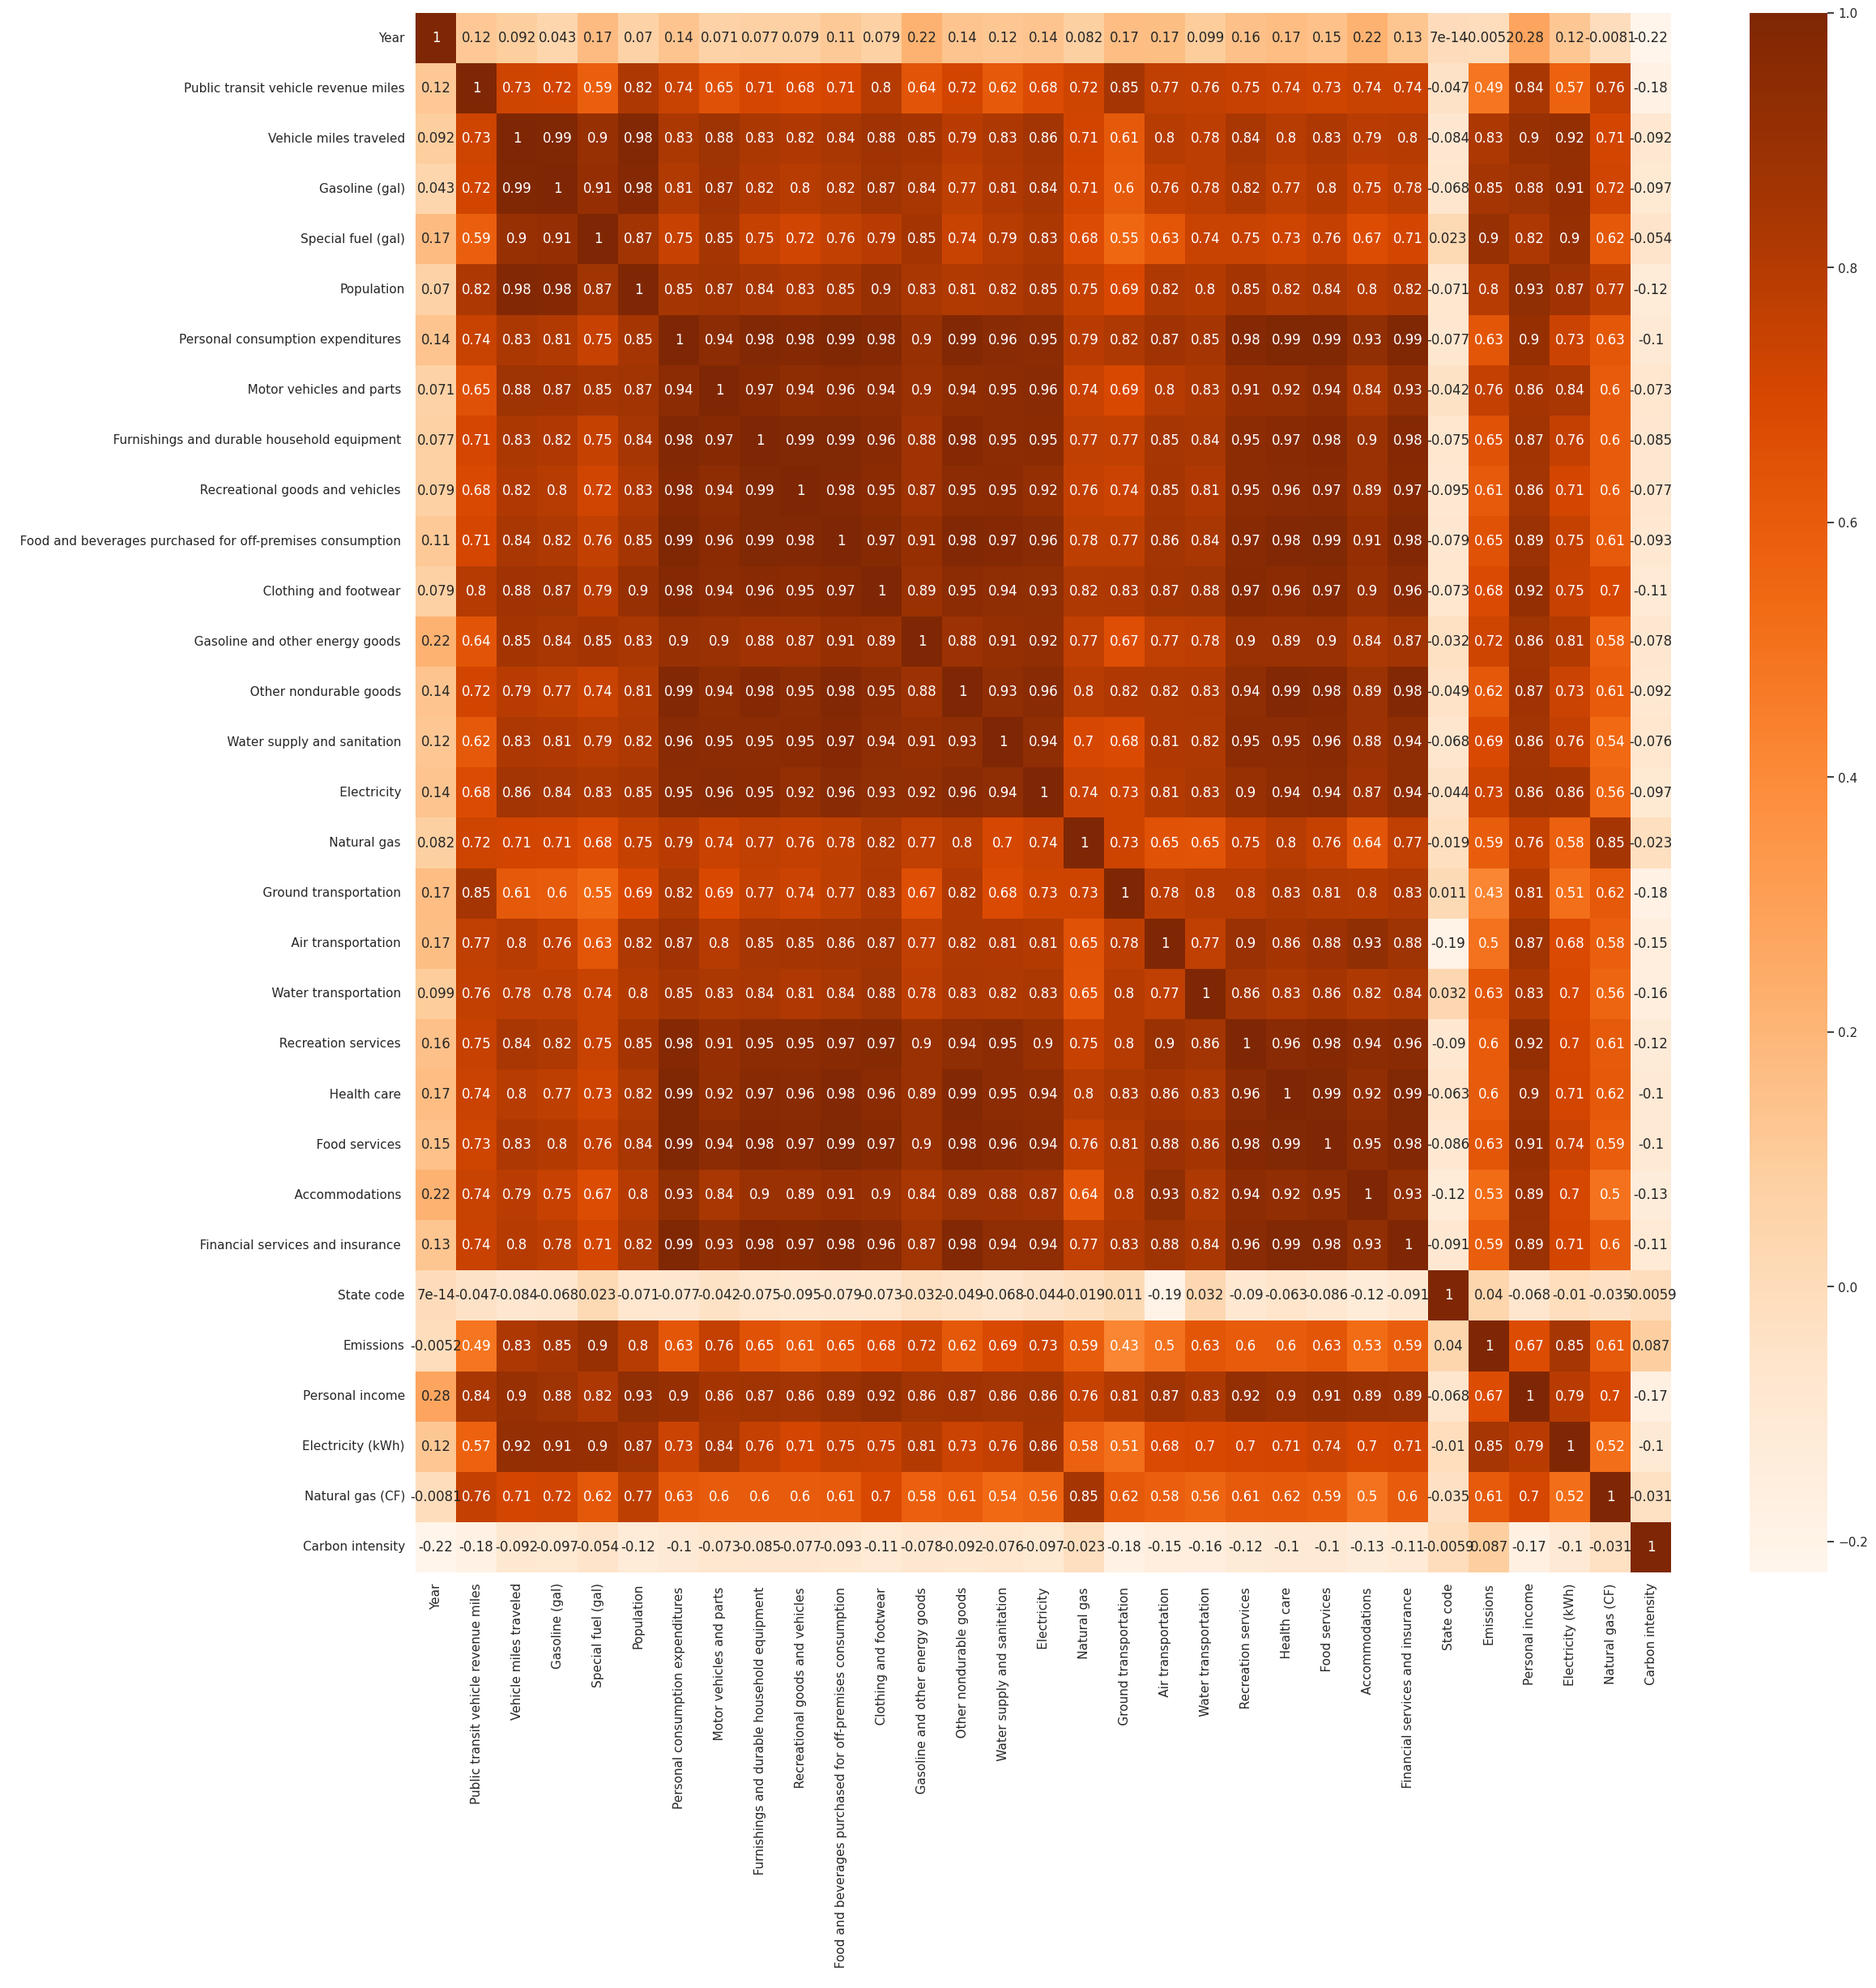

In [10]:
# correlation matrix
corr = co2variables.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(25,25))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='Oranges')
plt.show()

Most of our features are highly correlated to the dependent variable, **Emissions**.This means we did a good job at finding key drivers carbon emissions. However, the features are also highly correlated with each other (collinearity) which makes it hard to asses which variables are statistically significant.

# **Models and Results**

Like [[21]](https://arxiv.org/abs/2007.03051)'s work on carbon footprint estimation for deep learning models, I wanted our model to be easily interpretable and of low computational effort. I tested three different linear regression models on different subsets of features:


1. Linear Regression
2. Ridge Regressor - linear regression with l2 regularization
3. Huber Regressor - an outlier robust regressor

In [11]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [12]:
# scale features
scaler = StandardScaler()

# handle any missing values
co2variables.dropna(inplace=True)

x = co2variables.drop(['Emissions', 'State'], axis=1)
y = co2variables['Emissions']

# split into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

The coefficient of determination (R2) for Linear Regression on the training set is:0.9079886437157351
The coefficient of determination (R2) for Linear Regression the testing set is:0.9162831553713839
The mean absolute error for the testing set is:26802936.342225347
The mean absolute percentage error for the testing set is:0.6608402972757657


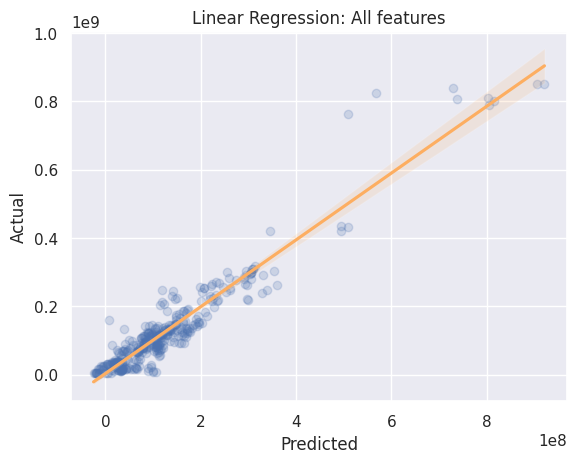

In [13]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
print(f"The coefficient of determination (R2) for Linear Regression on the training set is:{lr.score(x_train, y_train)}")
y_pred = lr.predict(x_test)
print(f"The coefficient of determination (R2) for Linear Regression the testing set is:{lr.score(x_test, y_test)}")
print(f"The mean absolute error for the testing set is:{mean_absolute_error(y_test, y_pred)}")
print(f"The mean absolute percentage error for the testing set is:{mean_absolute_percentage_error(y_test, y_pred)}")

ax = sns.regplot(x=y_pred, y=y_test, scatter_kws={'alpha':0.2}, line_kws={"color": "#fdae61"})
ax.set_title('Linear Regression: All features')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

The coefficient of determination (R2) for Ridge Regression on the training set is:0.8628341012302337
The coefficient of determination (R2) for Ridge Regression the testing set is:0.886997926666348
The mean absolute error for the testing set is:31375611.370672148
The mean absolute percentage error for the testing set is:0.5289598248031208


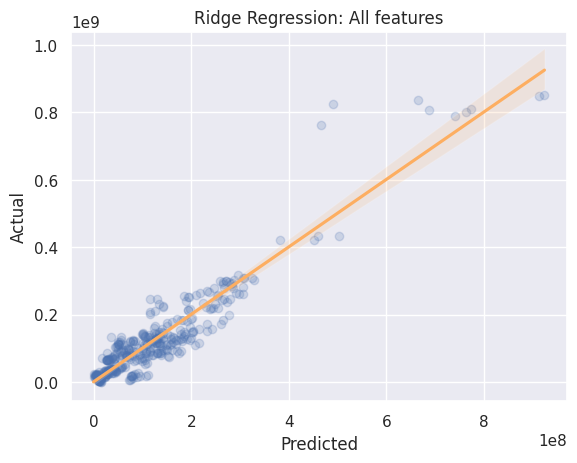

In [14]:
lr = Ridge(alpha=5000000, solver = 'lsqr')
lr.fit(x_train, y_train)
print(f"The coefficient of determination (R2) for Ridge Regression on the training set is:{lr.score(x_train, y_train)}")
y_pred = lr.predict(x_test)
print(f"The coefficient of determination (R2) for Ridge Regression the testing set is:{lr.score(x_test, y_test)}")
print(f"The mean absolute error for the testing set is:{mean_absolute_error(y_test, y_pred)}")
print(f"The mean absolute percentage error for the testing set is:{mean_absolute_percentage_error(y_test, y_pred)}")

ax = sns.regplot(x=y_pred, y=y_test, scatter_kws={'alpha':0.2}, line_kws={"color": "#fdae61"})
ax.set_title('Ridge Regression: All features')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

The coefficient of determination (R2) for Huber Regression on the training set is:0.709361586230989
The coefficient of determination (R2) for Huber Regression the testing set is:0.6896802866504894
The mean absolute error for the testing set is:41154502.88526979
The mean absolute percentage error for the testing set is:0.49313151072547234


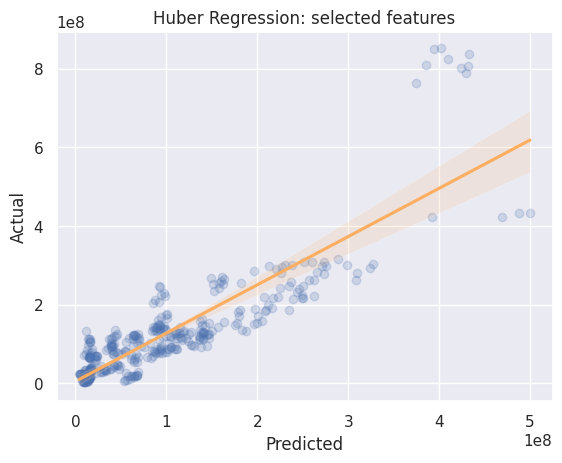

In [15]:
lr = HuberRegressor(alpha=500)
lr.fit(x_train, y_train)
print(f"The coefficient of determination (R2) for Huber Regression on the training set is:{lr.score(x_train, y_train)}")
y_pred = lr.predict(x_test)
print(f"The coefficient of determination (R2) for Huber Regression the testing set is:{lr.score(x_test, y_test)}")
print(f"The mean absolute error for the testing set is:{mean_absolute_error(y_test, y_pred)}")
print(f"The mean absolute percentage error for the testing set is:{mean_absolute_percentage_error(y_test, y_pred)}")

ax = sns.regplot(x=y_pred, y=y_test, scatter_kws={'alpha':0.2}, line_kws={"color": "#fdae61"})
ax.set_title('Huber Regression: selected features')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

The coefficient of determination (R2) for Linear Regression on the training set is:0.9079886437157351
The coefficient of determination (R2) for Linear Regression the testing set is:0.9162831553713839
The mean absolute error for the testing set is:26802936.342225347
The mean absolute percentage error for the testing set is:0.6608402972757657


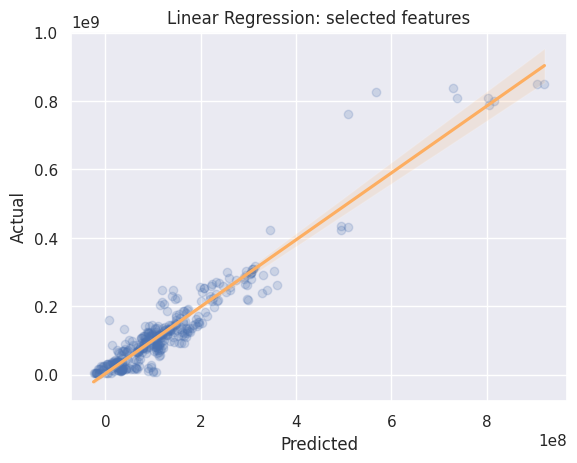

In [16]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
print(f"The coefficient of determination (R2) for Linear Regression on the training set is:{lr.score(x_train, y_train)}")
y_pred = lr.predict(x_test)
print(f"The coefficient of determination (R2) for Linear Regression the testing set is:{lr.score(x_test, y_test)}")
print(f"The mean absolute error for the testing set is:{mean_absolute_error(y_test, y_pred)}")
print(f"The mean absolute percentage error for the testing set is:{mean_absolute_percentage_error(y_test, y_pred)}")

ax = sns.regplot(x=y_pred, y=y_test, scatter_kws={'alpha':0.2}, line_kws={"color": "#fdae61"})
ax.set_title('Linear Regression: selected features')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()


The coefficient of determination (R2) for Ridge Regression on the training set is:0.8628341012302337
The coefficient of determination (R2) for Ridge Regression the testing set is:0.886997926666348
The mean absolute error for the testing set is:31375611.370672148
The mean absolute percentage error for the testing set is:0.5289598248031208


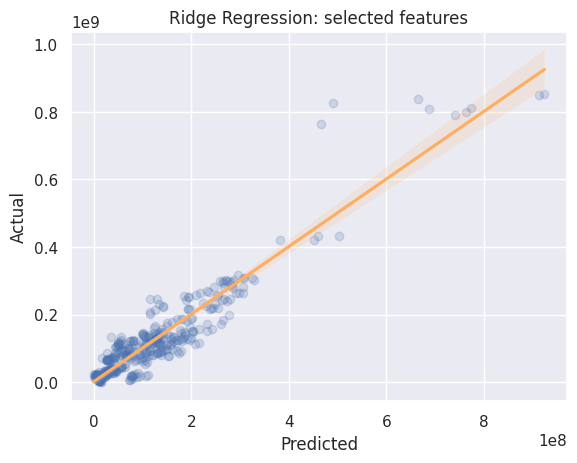

In [17]:
lr = Ridge(alpha=5000000, solver = 'lsqr')
lr.fit(x_train, y_train)
print(f"The coefficient of determination (R2) for Ridge Regression on the training set is:{lr.score(x_train, y_train)}")
y_pred = lr.predict(x_test)
print(f"The coefficient of determination (R2) for Ridge Regression the testing set is:{lr.score(x_test, y_test)}")
print(f"The mean absolute error for the testing set is:{mean_absolute_error(y_test, y_pred)}")
print(f"The mean absolute percentage error for the testing set is:{mean_absolute_percentage_error(y_test, y_pred)}")

ax = sns.regplot(x=y_pred, y=y_test, scatter_kws={'alpha':0.2}, line_kws={"color": "#fdae61"})
ax.set_title('Ridge Regression: selected features')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

The coefficient of determination (R2) for Huber Regression on the training set is:0.709361586230989
The coefficient of determination (R2) for Huber Regression the testing set is:0.6896802866504894
The mean absolute error for the testing set is:41154502.88526979
The mean absolute percentage error for the testing set is:0.49313151072547234


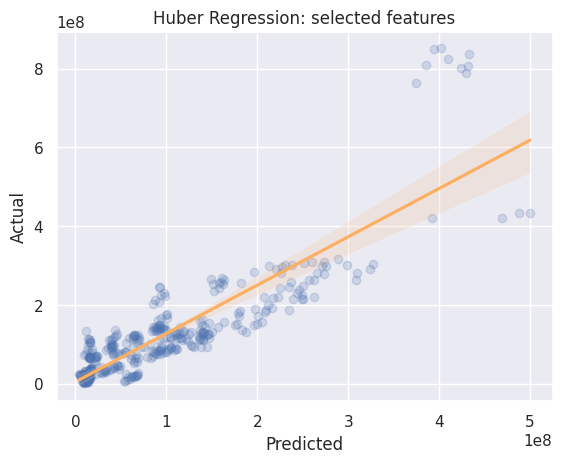

In [18]:
lr = HuberRegressor(alpha=500)
lr.fit(x_train, y_train)
print(f"The coefficient of determination (R2) for Huber Regression on the training set is:{lr.score(x_train, y_train)}")
y_pred = lr.predict(x_test)
print(f"The coefficient of determination (R2) for Huber Regression the testing set is:{lr.score(x_test, y_test)}")
print(f"The mean absolute error for the testing set is:{mean_absolute_error(y_test, y_pred)}")
print(f"The mean absolute percentage error for the testing set is:{mean_absolute_percentage_error(y_test, y_pred)}")

ax = sns.regplot(x=y_pred, y=y_test, scatter_kws={'alpha':0.2}, line_kws={"color": "#fdae61"})
ax.set_title('Huber Regression: selected features')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Results are similar across feature sets and models. The data seems to be a good fit for the model. However, the results are not reliable yet, since the mean absolute percentage error is high.

I will work on mitigating collinearity in the feature set. I will base myself on the literature's methodology to reduce this problem [[22]](https://www.mdpi.com/2227-7390/10/8/1283) [[23]](https://www.sciencedirect.com/science/article/pii/S0095447017302292).


I want to incorporate the Kaya identity into our model.
The Kaya identity successfully estimates total emissions from the energy sector. We can decompose the identity into the different categories of energy consumption (electricity, gas, transportation, residential). We can build a CO2 emissions estimator for each category, and then add the estimates together for the total emissions. We can also incorporate emissions data from the agricultural and waste sectors, which are not present in the Kaya identity. The carbon footprint of food varies largely across the supply chain. Beef emits about 60 kgCO2e per kilogram of product whereas the same amount of chicken emits about  kgCO2e. For a personal carbon footprint calculator, It is worth modeling this data in detail.

I also plan on exploring different machine learning architectures for personal carbon emisions estimation. There is a lot of literature concerning machine learning-based estimators carbon dioxide emissions at a larger scale. Estimator models include Neural Ordinary Differential Equations [[24]](https://arxiv.org/pdf/2201.02433.pdf), Gaussian Process Regression [[25]](https://www.frontiersin.org/articles/10.3389/fenrg.2021.756311/full), Random Forests [[26]](https://www.mdpi.com/2072-4292/14/13/3014), and Decision Trees [[27]](https://www.sciencedirect.com/science/article/pii/S2352550922001737).

# **Conclusion**

I presented the co2variables dataset and a linear model for personal carbon footprint estimation that aligns with LEAL Carbon’s mission to facilitate positive environmental change through data-driven insight on personal greenhouse gas emissions.

Linear Regression model achieved an R-squared score of 91.63, indicating that our data is a good fit for the task at hand.

For future work, I plan to expand our feature set and experiment with different machine learning models for carbon footprint analysis.

**Climate change is happening, but we can mitigate its most severe consequences if we hold ourselves accountable for our carbon footprint and take measures to reduce our emissions.**

